# <div align='center'>Mall Customer Segmentation</div>

Segmentation of customers into different clusters using K-Means clustering .

**importing necessary documents and libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin


In [2]:
df = pd.read_csv("cleaned_mall_customers.csv")
df.head()

,id,gender,age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Data Standardization**

In [3]:
x = df.drop('id', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(x)

#### Model Building (Clustering)

In [4]:
Kmeans_model = KMeans(n_clusters=2,random_state=42, init='k-means++')
Kmeans_model.fit(X)  #training

KMeans(n_clusters=2, random_state=42)

**Evaluation**

In [5]:
labels= Kmeans_model.predict(X)
print(f"inertia : {Kmeans_model.inertia_}")
print(f"silhouette score : {silhouette_score(X, Kmeans_model.labels_)}")

inertia : 597.9472937932279
silhouette score : 0.2776035125578272


#### Model Enhancement

**Determining optimal number of clusters**

1. According to inertia values:  
   compactness of clusters   
2. According to silhouette score:  
   definition and seperation of clusters 

In [6]:
distance=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(X)
    distance.append(model.inertia_)

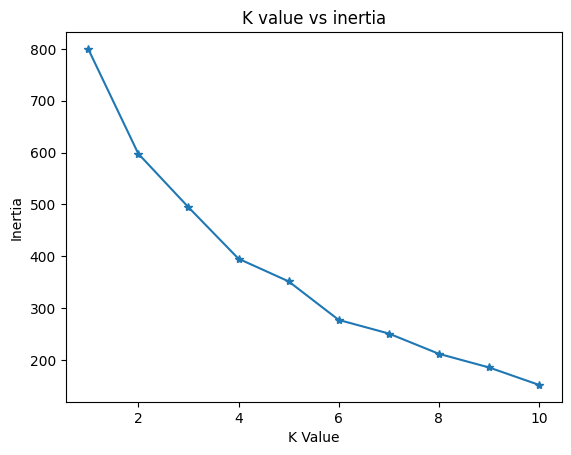

In [7]:
k_value=range(1,11)
plt.plot(k_value, distance, marker='*')
plt.title("K value vs inertia")
plt.xlabel("K Value")
plt.ylabel("Inertia")
plt.show()

*According to plot 4 or 6 can potentially be a good value*

k value according to silhouette score

In [8]:
score =[]
k= [3,4,5,6,8]
for i in k:
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(X)
    cluster_label = model.labels_
    score.append(silhouette_score(X,cluster_label))

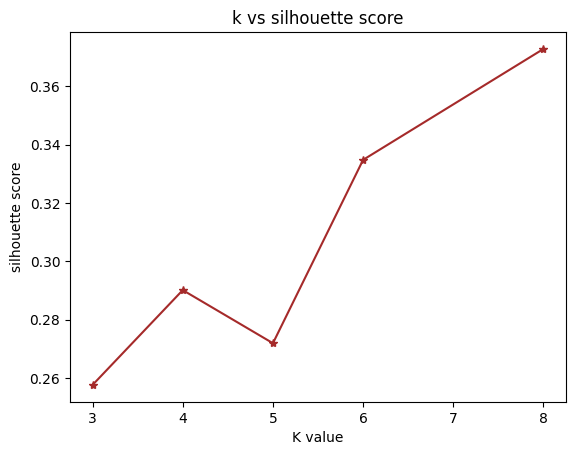

In [9]:
plt.plot(k,score, marker='*',color='brown')
plt.title("k vs silhouette score")
plt.xlabel("K value")
plt.ylabel("silhouette score")
plt.show()

*Based on both the plots 6 is an optimal number for clusters.*

Training the model for 6 clusters

In [10]:
Kmeans_model = KMeans(n_clusters=6, random_state=42)
df['cluster']= Kmeans_model.fit_predict(X)

#### Cluster Evaluation

In [11]:
labels= Kmeans_model.predict(X)
print(f"inertia : {Kmeans_model.inertia_}")
print(f"silhouette score : {silhouette_score(X, Kmeans_model.labels_)}")

inertia : 277.3897401985191
silhouette score : 0.3347543475669217


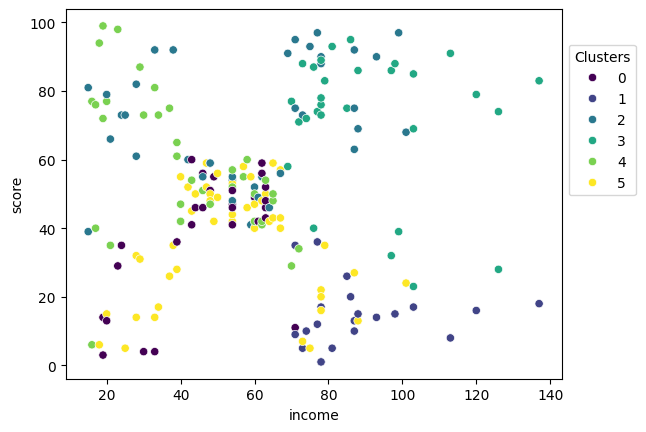

In [12]:
sns.scatterplot(x='income',y='score',hue='cluster',data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1,0.7), loc='center left', title='Clusters')
plt.show()

*Our model has four features. Rducing dimentionality to visualize clusters*

**Dimentionality reduction**

In [13]:
c_label= pairwise_distances_argmin(X, Kmeans_model.cluster_centers_)

pca = PCA(n_components=2)
components =pca.fit_transform(X)
pca_df = pd.DataFrame(data=components, columns=['dimention1','dimention2'])
pca_df['clusters'] = c_label

pca_centers = pca.transform(Kmeans_model.cluster_centers_)

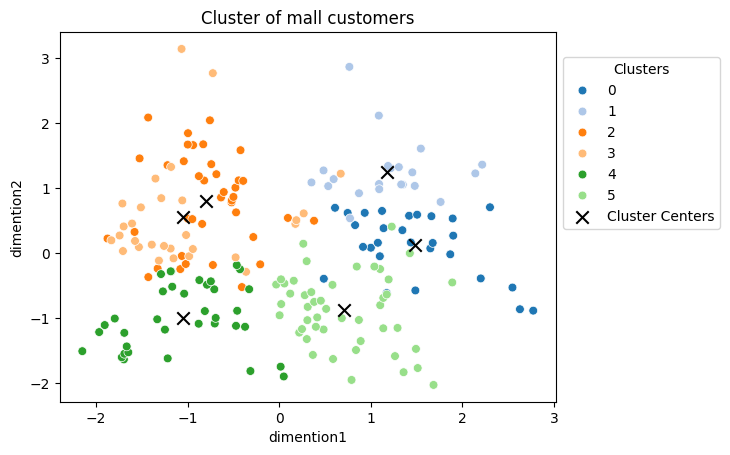

In [14]:
#plotting the clusters
sns.scatterplot(x= pca_df['dimention1'], y=pca_df['dimention2'], hue=pca_df['clusters'], palette='tab20', s=40)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], color='black', marker='x', s=80, label='Cluster Centers')
plt.legend(title= 'Clusters', loc='center left', bbox_to_anchor=(1,0.7))
plt.title("Cluster of mall customers")
plt.show()